# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Rizqy Mubarok
- **Email:** rizqymubarok99@gmail.com
- **ID Dicoding:** rizqy mubarok

## Menentukan Pertanyaan Bisnis

1. Analisis Distribusi Pelanggan:

    Pertanyaan Bisnis:
        Di mana lokasi konsentrasi pelanggan terbesar? Apakah ada wilayah tertentu yang memiliki lebih banyak pelanggan dibandingkan wilayah lainnya?
        Apakah distribusi pelanggan lebih banyak berada di kota-kota besar atau di daerah dengan kode pos tertentu?
      

2. Analisis Pembayaran:

    Pertanyaan Bisnis:
        Jenis pembayaran apa yang paling sering digunakan oleh pelanggan? Apakah ada preferensi pembayaran tertentu berdasarkan wilayah atau kota?
        Bagaimana distribusi pembayaran berdasarkan jenisnya? Apakah ada metode pembayaran yang lebih populer di kalangan pelanggan tertentu?
        Apakah ada hubungan antara jenis pembayaran dengan jumlah transaksi atau nilai pembayaran?

3. Analisis RFM (Recency, Frequency, Monetary):

    Pertanyaan Bisnis:
        Bagaimana membagi pelanggan berdasarkan nilai RFM mereka? Siapa saja pelanggan dengan nilai RFM tinggi (high value) dan rendah (low value)?
        Apa karakteristik pelanggan yang berpotensi memberikan pendapatan tinggi (high value) dalam jangka panjang?
        Dapatkah pelanggan dengan nilai rendah diberi insentif atau strategi pemasaran untuk meningkatkan frekuensi dan nilai pembelian mereka?

4. Analisis Geospatial:

    Pertanyaan Bisnis:
        Apakah ada pola geografis tertentu dalam distribusi pelanggan atau titik pengiriman?
        Seberapa jauh jarak antar titik pengiriman dan bagaimana pengaruhnya terhadap biaya atau waktu pengiriman?
        Apakah kluster geografis tertentu memiliki potensi untuk menawarkan layanan atau produk yang lebih khusus berdasarkan karakteristik lokal?

5. Segmentasi Pelanggan dengan K-Means:

    Pertanyaan Bisnis:
        Apakah segmentasi berdasarkan geolokasi memberikan wawasan tambahan untuk strategi pemasaran atau logistik?
        Bagaimana cara menggunakan kluster ini untuk merancang kampanye pemasaran yang lebih efektif atau meningkatkan pengalaman pelanggan?
        Apakah ada kluster yang dapat dijadikan target untuk pengembangan produk baru atau penawaran khusus?

6. Pemetaan dan Buffer Area:

    Pertanyaan Bisnis:
        Bagaimana menggunakan informasi jarak dan buffer area untuk merencanakan distribusi atau pemasaran berbasis lokasi?
        Apakah ada peluang untuk membuka cabang baru atau menambah titik distribusi di area dengan konsentrasi pelanggan tinggi?
        Bagaimana pemetaan geografis bisa membantu dalam perencanaan strategi pengiriman atau peningkatan layanan di lokasi tertentu?



## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import seaborn as sns
import geopandas as gpd
import folium
from geopy.distance import geodesic
from sklearn.cluster import KMeans
from shapely.geometry import Point

## Data Wrangling

### Gathering Data

In [6]:
#1.Customer_df
customer_df = pd.read_csv("Data\customers_dataset.csv")
customer_df.head()

#2.Geolocation_df
geolocation_df = pd.read_csv("Data\geolocation_dataset.csv")
geolocation_df.head()

#3.Order_Payment_df
order_payments_df = pd.read_csv("Data\order_payments_dataset.csv")
order_payments_df.head()

<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:6: SyntaxWarning: invalid escape sequence '\g'
<>:10: SyntaxWarning: invalid escape sequence '\o'
<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:6: SyntaxWarning: invalid escape sequence '\g'
<>:10: SyntaxWarning: invalid escape sequence '\o'
C:\Users\rizqy\AppData\Local\Temp\ipykernel_20060\3065360411.py:2: SyntaxWarning: invalid escape sequence '\c'
  customer_df = pd.read_csv("Data\customers_dataset.csv")
C:\Users\rizqy\AppData\Local\Temp\ipykernel_20060\3065360411.py:6: SyntaxWarning: invalid escape sequence '\g'
  geolocation_df = pd.read_csv("Data\geolocation_dataset.csv")
C:\Users\rizqy\AppData\Local\Temp\ipykernel_20060\3065360411.py:10: SyntaxWarning: invalid escape sequence '\o'
  order_payments_df = pd.read_csv("Data\order_payments_dataset.csv")


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Insight:**
-
-

### Assessing Data

In [7]:
 #Tahap data Assesing
customer_df.info()

customer_df.isna().sum() #periksa duplikasi dengan methode is.na dan is.sum

print("Jumlah duplikasi: ", customer_df.duplicated().sum())

customer_df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [8]:

geolocation_df.info()

geolocation_df.isna().sum()

print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

geolocation_df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [9]:
order_payments_df.info()

order_payments_df.isna().sum()

print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())

order_payments_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [10]:

#1 Customer
# Mengelompokkan berdasarkan customer_state dan customer_city, lalu mengurutkan berdasarkan jumlah customer
grouped = customer_df.groupby(['customer_state', 'customer_city']).size().sort_values(ascending=False)
print(grouped)



customer_state  customer_city           
SP              sao paulo                   15540
RJ              rio de janeiro               6882
MG              belo horizonte               2773
DF              brasilia                     2131
PR              curitiba                     1521
                                            ...  
TO              divinopolis do tocantins        1
                augustinopolis                  1
                buriti do tocantins             1
                carmolandia                     1
                centenario                      1
Length: 4310, dtype: int64


In [11]:
#2 Geolocation
# Mengelompokkan berdasarkan geolocation_state dan geollocation_city, lalu mengurutkan berdasarkan peringkat
grouped = geolocation_df.groupby(['geolocation_state', 'geolocation_city']).size().sort_values(ascending=False)
print(grouped)



geolocation_state  geolocation_city    
SP                 sao paulo               135799
RJ                 rio de janeiro           62149
MG                 belo horizonte           27805
SP                 são paulo                24917
PR                 curitiba                 16593
                                            ...  
GO                 cromínia                     1
                   davinópolis                  1
                   divinópolis de goiás         1
AC                 capixaba                     1
TO                 rio da conceição             1
Length: 8463, dtype: int64


In [12]:
#3 order payment
# Mengelompokkan berdasarkan payment_tipe  lalu mengurutkan berdasarkan jumlah data
grouped = order_payments_df.groupby("payment_type").size().sort_values(ascending=False)
print(grouped)

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
dtype: int64


**Insight:**
 Dari hasil asesmen data yang ada, berikut adalah beberapa insight yang dapat diambil:
1. Data Customer:

    Jumlah Data: Terdapat 99.441 entri dalam dataset pelanggan.
    Kolom yang Tersedia: Dataset mencakup informasi tentang ID pelanggan, ID unik pelanggan, kode pos, kota, dan negara bagian. Semua kolom ini memiliki data yang lengkap (non-null).
    No Duplication: Tidak ada duplikasi dalam data pelanggan, yang menunjukkan bahwa setiap pelanggan memiliki entri yang unik.
    Distribusi Kota dan Negara Bagian:
        Negara bagian yang paling sering muncul adalah SP (São Paulo) dengan 15.540 entri, diikuti oleh RJ (Rio de Janeiro) dengan 6.882 entri.
        Beberapa kota yang paling sering muncul adalah São Paulo dan Rio de Janeiro. Data ini dapat digunakan untuk analisis lebih lanjut terkait distribusi pelanggan di berbagai kota dan negara bagian.
    Kota Unik: Terdapat lebih dari 4.300 kombinasi unik antara kota dan negara bagian dalam data, yang menunjukkan keragaman lokasi pelanggan.

2. Data Geolocation:

    Jumlah Data: Dataset geolokasi berisi 1.000.163 entri.
    Kolom yang Tersedia: Dataset ini memiliki kolom mengenai kode pos, latitude (lintang), longitude (bujur), kota, dan negara bagian.
    Duplikasi: Terdapat 261.831 duplikasi, yang berarti bahwa ada beberapa kode pos yang memiliki lebih dari satu lokasi geolokasi terkait.
    Distribusi Kota dan Negara Bagian:
        Sama seperti pada data pelanggan, São Paulo dan Rio de Janeiro muncul paling banyak sebagai kota dan negara bagian dengan jumlah yang sangat besar (lebih dari 100.000 entri untuk São Paulo).
        Namun, ada lebih banyak variasi kota dan negara bagian pada dataset ini dibandingkan dengan data pelanggan, yang menunjukkan bahwa dataset ini lebih kaya dalam hal lokasi geolokasi.

3. Data Pembayaran:

    Jumlah Data: Dataset pembayaran berisi 103.886 entri.
    Kolom yang Tersedia: Dataset ini mencakup informasi tentang ID pesanan, urutan pembayaran, jenis pembayaran, jumlah cicilan, dan nilai pembayaran.
    Jenis Pembayaran:
        Pembayaran dengan kartu kredit adalah yang paling umum, dengan lebih dari 76.000 transaksi, diikuti oleh boleto (sekitar 19.700 transaksi).
        Voucher dan kartu debit juga hadir dalam dataset ini, meskipun lebih sedikit dibandingkan dengan dua jenis pembayaran utama.
    Tidak Terdefinisi: Ada 3 entri dengan jenis pembayaran yang tidak terdefinisi, yang mungkin menunjukkan adanya data yang hilang atau masalah dengan format data.


### Cleaning Data

In [15]:
# Mengatasi missing value
customer_df.dropna(inplace=True)
geolocation_df.dropna(inplace=True)
order_payments_df.dropna(inplace=True)

# Mengatasi duplikasi
customer_df.drop_duplicates(inplace=True)
geolocation_df.drop_duplicates(inplace=True)
order_payments_df.drop_duplicates(inplace=True)

**Insight:**
Dari hasil asesmen data yang diberikan, berikut adalah beberapa insight yang dapat diambil:
1. Data Customer:

    Jumlah Data: Terdapat 99.441 entri dalam dataset pelanggan.
    Kolom yang Tersedia: Dataset mencakup informasi tentang ID pelanggan, ID unik pelanggan, kode pos, kota, dan negara bagian. Semua kolom ini memiliki data yang lengkap (non-null).
    No Duplication: Tidak ada duplikasi dalam data pelanggan, yang menunjukkan bahwa setiap pelanggan memiliki entri yang unik.
    Distribusi Kota dan Negara Bagian:
        Negara bagian yang paling sering muncul adalah SP (São Paulo) dengan 15.540 entri, diikuti oleh RJ (Rio de Janeiro) dengan 6.882 entri.
        Beberapa kota yang paling sering muncul adalah São Paulo dan Rio de Janeiro. Data ini dapat digunakan untuk analisis lebih lanjut terkait distribusi pelanggan di berbagai kota dan negara bagian.
    Kota Unik: Terdapat lebih dari 4.300 kombinasi unik antara kota dan negara bagian dalam data, yang menunjukkan keragaman lokasi pelanggan.

2. Data Geolocation:

    Jumlah Data: Dataset geolokasi berisi 1.000.163 entri.
    Kolom yang Tersedia: Dataset ini memiliki kolom mengenai kode pos, latitude (lintang), longitude (bujur), kota, dan negara bagian.
    Duplikasi: Terdapat 261.831 duplikasi, yang berarti bahwa ada beberapa kode pos yang memiliki lebih dari satu lokasi geolokasi terkait.
    Distribusi Kota dan Negara Bagian:
        Sama seperti pada data pelanggan, São Paulo dan Rio de Janeiro muncul paling banyak sebagai kota dan negara bagian dengan jumlah yang sangat besar (lebih dari 100.000 entri untuk São Paulo).
        Namun, ada lebih banyak variasi kota dan negara bagian pada dataset ini dibandingkan dengan data pelanggan, yang menunjukkan bahwa dataset ini lebih kaya dalam hal lokasi geolokasi.

3. Data Pembayaran:

    Jumlah Data: Dataset pembayaran berisi 103.886 entri.
    Kolom yang Tersedia: Dataset ini mencakup informasi tentang ID pesanan, urutan pembayaran, jenis pembayaran, jumlah cicilan, dan nilai pembayaran.
    Jenis Pembayaran:
        Pembayaran dengan kartu kredit adalah yang paling umum, dengan lebih dari 76.000 transaksi, diikuti oleh boleto (sekitar 19.700 transaksi).
        Voucher dan kartu debit juga hadir dalam dataset ini, meskipun lebih sedikit dibandingkan dengan dua jenis pembayaran utama.
    Tidak Terdefinisi: Ada 3 entri dengan jenis pembayaran yang tidak terdefinisi, yang mungkin menunjukkan adanya data yang hilang atau masalah dengan format data.

## Exploratory Data Analysis (EDA)

### Explore ...

In [16]:
# Membuat pivot table berdasarkan customer_state dan menghitung jumlah unik customer_id
pivot_table_state = customer_df.groupby('customer_state').agg({
    'customer_id': 'nunique',  # Menghitung jumlah unik customer_id
    'customer_unique_id': 'nunique',  # Menghitung jumlah unik customer_unique_id
    'customer_zip_code_prefix': 'nunique',  # Menghitung jumlah unik zip code prefix
    'customer_city': 'nunique'  # Menghitung jumlah unik kota
}).reset_index()

# Menampilkan pivot table berdasarkan customer_state
print("Pivot Table berdasarkan customer_state:")
print(pivot_table_state)


Pivot Table berdasarkan customer_state:
   customer_state  customer_id  customer_unique_id  customer_zip_code_prefix  \
0              AC           81                  77                        20   
1              AL          413                 401                       126   
2              AM          148                 143                        55   
3              AP           68                  67                        18   
4              BA         3380                3277                       735   
5              CE         1336                1313                       384   
6              DF         2140                2075                       465   
7              ES         2033                1964                       265   
8              GO         2020                1952                       540   
9              MA          747                 726                       196   
10             MG        11635               11259                      1349   


In [17]:
# Membuat pivot table berdasarkan customer_city dan menghitung jumlah unik customer_id
pivot_table_city = customer_df.groupby('customer_city').agg({
    'customer_id': 'nunique',  # Menghitung jumlah unik customer_id
    'customer_unique_id': 'nunique',  # Menghitung jumlah unik customer_unique_id
    'customer_zip_code_prefix': 'nunique',  # Menghitung jumlah unik zip code prefix
    'customer_state': 'nunique'  # Menghitung jumlah unik state
}).reset_index()

# Menampilkan pivot table berdasarkan customer_city
print("Pivot Table berdasarkan customer_city:")
print(pivot_table_city)


Pivot Table berdasarkan customer_city:
            customer_city  customer_id  customer_unique_id  \
0     abadia dos dourados            3                   3   
1               abadiania            1                   1   
2                  abaete           12                  12   
3              abaetetuba           11                  11   
4                 abaiara            2                   2   
...                   ...          ...                 ...   
4114             xinguara            9                   9   
4115          xique-xique            3                   3   
4116             zacarias            2                   2   
4117              ze doca            5                   5   
4118               zortea            2                   2   

      customer_zip_code_prefix  customer_state  
0                            1               1  
1                            1               1  
2                            1               1  
3                   

In [19]:
# Membuat pivot table berdasarkan geolocation_state
pivot_table_state_geolocation = geolocation_df.groupby('geolocation_state').agg({
    'geolocation_zip_code_prefix': 'nunique',  # Menghitung jumlah unik ZIP Code Prefix
    'geolocation_lat': 'mean',  # Menghitung rata-rata latitude
    'geolocation_lng': 'mean',  # Menghitung rata-rata longitude
    'geolocation_city': 'nunique'  # Menghitung jumlah unik kota
}).reset_index()

# Menampilkan pivot table berdasarkan geolocation_state
print("Pivot Table berdasarkan geolocation_state:")
print(pivot_table_state_geolocation)


Pivot Table berdasarkan geolocation_state:
   geolocation_state  geolocation_zip_code_prefix  geolocation_lat  \
0                 AC                           46        -9.709319   
1                 AL                          178        -9.592373   
2                 AM                          144        -3.346562   
3                 AP                           26         0.073767   
4                 BA                          992       -13.062407   
5                 CE                          548        -4.395199   
6                 DF                          516       -15.814327   
7                 ES                          315       -20.078083   
8                 GO                          773       -16.567440   
9                 MA                          313        -3.821203   
10                MG                         1868       -19.857420   
11                MS                          242       -20.790811   
12                MT                          2

In [18]:
# Membuat pivot table berdasarkan geolocation_city
pivot_table_city_geolocation = geolocation_df.groupby('geolocation_city').agg({
    'geolocation_zip_code_prefix': 'nunique',  # Menghitung jumlah unik ZIP Code Prefix
    'geolocation_lat': 'mean',  # Menghitung rata-rata latitude
    'geolocation_lng': 'mean',  # Menghitung rata-rata longitude
    'geolocation_state': 'nunique'  # Menghitung jumlah unik negara bagian
}).reset_index()

# Menampilkan pivot table berdasarkan geolocation_city
print("Pivot Table berdasarkan geolocation_city:")
print(pivot_table_city_geolocation)


Pivot Table berdasarkan geolocation_city:
        geolocation_city  geolocation_zip_code_prefix  geolocation_lat  \
0               * cidade                            1       -25.571748   
1     ...arraial do cabo                            1       -22.969370   
2         4o. centenario                            1       -24.271860   
3          4º centenario                            1       -24.279801   
4        abadia de goias                            1       -16.767161   
...                  ...                          ...              ...   
8006               áurea                            1       -27.695009   
8007              ângulo                            1       -23.195501   
8008       érico cardoso                            1       -13.393047   
8009              óbidos                            1        -1.907556   
8010                óleo                            1       -22.940222   

      geolocation_lng  geolocation_state  
0          -49.334374     

In [20]:

# Membuat pivot table berdasarkan payment_type
pivot_table_payment_type = order_payments_df.groupby('payment_type').agg({
    'order_id': 'nunique',  # Menghitung jumlah unik order_id per payment_type
    'payment_value': 'sum',  # Menghitung total payment_value per payment_type
    'payment_installments': 'mean'  # Menghitung rata-rata payment_installments per payment_type
}).reset_index()

# Menampilkan pivot table berdasarkan payment_type
print("Pivot Table berdasarkan payment_type:")
print(pivot_table_payment_type)

Pivot Table berdasarkan payment_type:
  payment_type  order_id  payment_value  payment_installments
0       boleto     19784     2869361.27              1.000000
1  credit_card     76505    12542084.19              3.507155
2   debit_card      1528      217989.79              1.000000
3  not_defined         3           0.00              1.000000
4      voucher      3866      379436.87              1.000000


In [21]:
# Membuat pivot table berdasarkan payment_sequential (sequential payment within orders)
pivot_table_payment_sequential = order_payments_df.groupby('payment_sequential').agg({
    'order_id': 'nunique',  # Menghitung jumlah unik order_id per payment_sequential
    'payment_value': 'sum',  # Menghitung total payment_value per payment_sequential
    'payment_installments': 'mean'  # Menghitung rata-rata payment_installments per payment_sequential
}).reset_index()

# Menampilkan pivot table berdasarkan payment_sequential
print("Pivot Table berdasarkan payment_sequential:")
print(pivot_table_payment_sequential)

Pivot Table berdasarkan payment_sequential:
    payment_sequential  order_id  payment_value  payment_installments
0                    1     99360    15732341.83              2.929640
1                    2      3039      240390.52              1.265219
2                    3       581       17672.69              1.003442
3                    4       278        6467.79              1.000000
4                    5       170        4062.30              1.000000
5                    6       118        2839.27              1.000000
6                    7        82        1695.14              1.000000
7                    8        54         725.62              1.000000
8                    9        43         581.43              1.000000
9                   10        34         530.99              1.000000
10                  11        29         387.19              1.000000
11                  12        21         337.63              1.000000
12                  13        13         114.0

**Insight: berikut beberapa insight yang bisa **
1. Pivot Table Berdasarkan customer_state:

    Distribusi Customer per State:
        Negara bagian São Paulo (SP) memiliki jumlah pelanggan yang sangat besar, mencapai 41.746 pelanggan, diikuti oleh Minas Gerais (MG) dengan 11.635 pelanggan, dan Rio de Janeiro (RJ) dengan 12.852 pelanggan.
        Sebaliknya, ada negara bagian dengan jumlah pelanggan yang lebih kecil, seperti Roraima (RR) dengan hanya 46 pelanggan.
    Kode Pos dan Kota:
        Setiap negara bagian memiliki rentang kode pos dan variasi kota yang berbeda. Misalnya, São Paulo memiliki lebih dari 5.500 kode pos berbeda dan 629 kota yang terdaftar.

2. Pivot Table Berdasarkan customer_city:

    Distribusi Customer per City:
        Banyak kota memiliki jumlah pelanggan yang kecil, dengan banyak kota yang hanya memiliki 1 pelanggan, seperti pada cidade dan 4o. centenario.
        Kota-kota besar seperti São Paulo, Rio de Janeiro, dan Belo Horizonte tidak muncul dalam pivot ini karena data pelanggan lebih terfokus pada tingkat negara bagian.
    Variasi Kota: Pivot ini memperlihatkan banyaknya kota dengan jumlah pelanggan yang sangat bervariasi, menunjukkan keragaman dalam distribusi pelanggan.

3. Pivot Table Berdasarkan geolocation_state:

    Distribusi Geolokasi per State:
        São Paulo (SP) memiliki jumlah titik geolokasi terbesar dengan 6.349 entri, diikuti oleh Minas Gerais (MG) dengan 1.868 entri.
        Roraima (RR) dan Acre (AC) memiliki jumlah geolokasi yang jauh lebih rendah (masing-masing 28 dan 46).
    Latitude dan Longitude: Data geolokasi ini memberikan gambaran tentang distribusi geografis, dengan variasi lintang dan bujur yang luas, mencerminkan keragaman lokasi fisik.

4. Pivot Table Berdasarkan geolocation_city:

    Distribusi Geolokasi per City:
        Seperti halnya dengan data kota pada customer, kota-kota tertentu memiliki hanya satu entri geolokasi, misalnya pada kota "cidade" dan "4º centenario".
        Kota dengan nama lebih spesifik dan yang lebih besar dalam hal geolokasi juga dapat dilihat, seperti São Paulo dan Rio de Janeiro, meskipun ini lebih terkait dengan data geolokasi.

5. Pivot Table Berdasarkan payment_type:

    Jenis Pembayaran dan Jumlah Transaksi:
        Kartu Kredit (credit_card) adalah metode pembayaran yang paling dominan, dengan lebih dari 76.500 transaksi dan nilai pembayaran lebih dari 12,5 juta.
        Boleto menempati urutan kedua dengan sekitar 19.784 transaksi, namun dengan nilai pembayaran yang jauh lebih kecil (sekitar 2,86 juta).
        Voucher dan Kartu Debit (debit_card) memiliki transaksi yang lebih sedikit, dengan voucher mencapai 3.866 transaksi dan debit_card hanya 1.528 transaksi.
        Not Defined: Terdapat 3 transaksi dengan jenis pembayaran yang tidak terdefinisi, yang perlu dianalisis lebih lanjut untuk mengidentifikasi masalah dalam data.

6. Pivot Table Berdasarkan payment_sequential:

    Urutan Pembayaran:
        Sebagian besar transaksi terjadi pada urutan pertama pembayaran, dengan 99.360 transaksi yang mencakup hampir 15,7 juta dalam total pembayaran.
        Pada urutan kedua, jumlah transaksi jauh lebih sedikit, dengan hanya 3.039 transaksi, dan begitu seterusnya.
        Jumlah Cicilan (payment_installments): Rata-rata jumlah cicilan untuk urutan pertama adalah sekitar 2,93, yang berarti sebagian besar pembayaran dilakukan dalam 2-3 cicilan.

## Visualization & Explanatory Analysis

### Pertanyaan 1. Analisis Distribusi Pelanggan:

    Pertanyaan Bisnis:
        Di mana lokasi konsentrasi pelanggan terbesar? Apakah ada wilayah tertentu yang memiliki lebih banyak pelanggan dibandingkan wilayah lainnya?
        Apakah distribusi pelanggan lebih banyak berada di kota-kota besar atau di daerah dengan kode pos tertentu?

C:\Users\rizqy\AppData\Local\Temp\ipykernel_20060\1289122096.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette="viridis")


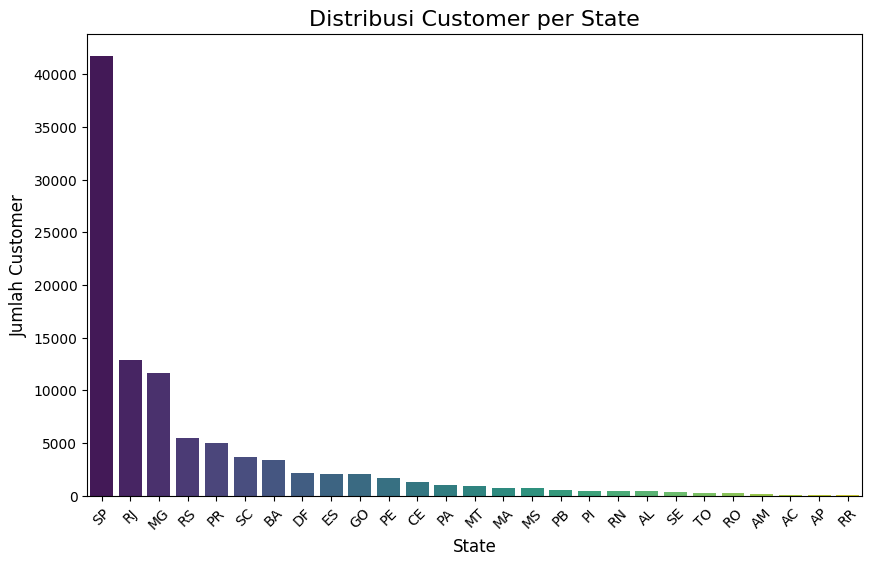

In [22]:
# a. Customer Dataset
# Distribusi Customer per State
plt.figure(figsize=(10, 6))
state_counts = customer_df['customer_state'].value_counts()
sns.barplot(x=state_counts.index, y=state_counts.values, palette="viridis")
plt.title("Distribusi Customer per State", fontsize=16)
plt.xlabel("State", fontsize=12)
plt.ylabel("Jumlah Customer", fontsize=12)
plt.xticks(rotation=45)
plt.show()



C:\Users\rizqy\AppData\Local\Temp\ipykernel_20060\1645715153.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.index, y=city_counts.values, palette="viridis")


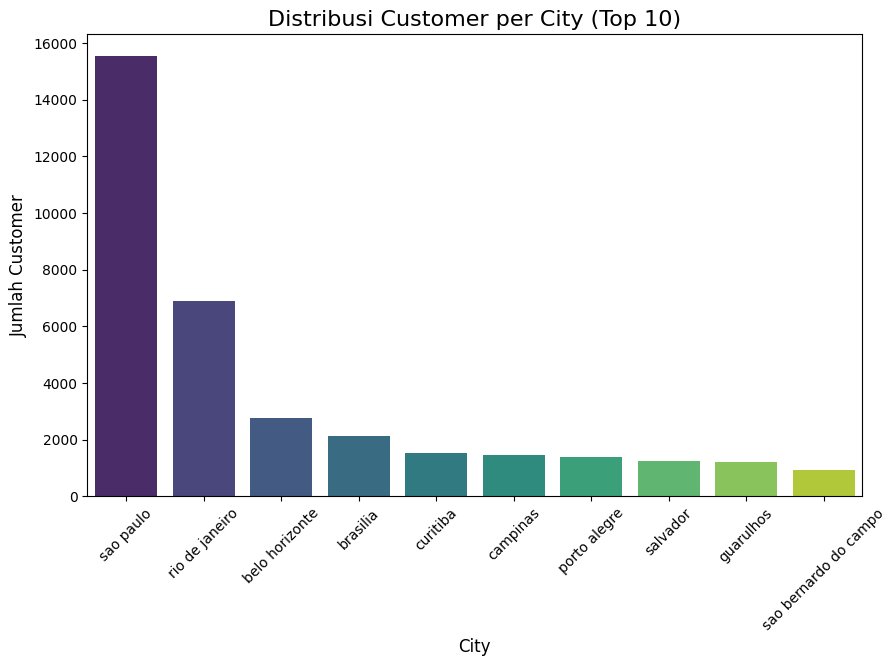

In [23]:
# Distribusi Customer per City (Top 10)
plt.figure(figsize=(10, 6))
city_counts = customer_df['customer_city'].value_counts().head(10)
sns.barplot(x=city_counts.index, y=city_counts.values, palette="viridis")
plt.title("Distribusi Customer per City (Top 10)", fontsize=16)
plt.xlabel("City", fontsize=12)
plt.ylabel("Jumlah Customer", fontsize=12)
plt.xticks(rotation=45)
plt.show()


### Pertanyaan 2 analisis Pembayaran:

    Pertanyaan Bisnis:
        Jenis pembayaran apa yang paling sering digunakan oleh pelanggan? Apakah ada preferensi pembayaran tertentu berdasarkan wilayah atau kota?
        Bagaimana distribusi pembayaran berdasarkan jenisnya? Apakah ada metode pembayaran yang lebih populer di kalangan pelanggan tertentu?
        Apakah ada hubungan antara jenis pembayaran dengan jumlah transaksi atau nilai pembayaran?

C:\Users\rizqy\AppData\Local\Temp\ipykernel_20060\3917352209.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_type_counts.index, y=payment_type_counts.values, palette="coolwarm")


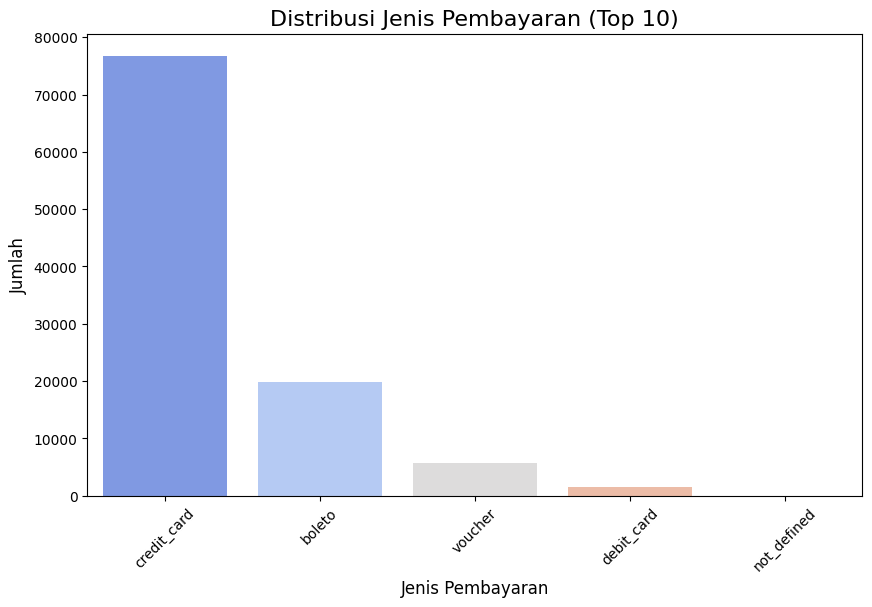

In [24]:
# Distribusi Payment Type (Top 10)
plt.figure(figsize=(10, 6))
payment_type_counts = order_payments_df['payment_type'].value_counts().head(10)
sns.barplot(x=payment_type_counts.index, y=payment_type_counts.values, palette="coolwarm")
plt.title("Distribusi Jenis Pembayaran (Top 10)", fontsize=16)
plt.xlabel("Jenis Pembayaran", fontsize=12)
plt.ylabel("Jumlah", fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [25]:
# Heatmap untuk Customer Dataset (Hanya kolom numerik)
customer_numerical_columns = customer_df.select_dtypes(include=['float64', 'int64']).columns

# Membuat heatmap jika ada kolom numerik
if len(customer_numerical_columns) > 1:
    plt.figure(figsize=(12, 8))
    customer_correlation_matrix = customer_df[customer_numerical_columns].corr()  # Menggunakan kolom numerik
    sns.heatmap(customer_correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Heatmap Korelasi Customer Dataset", fontsize=16)
    plt.show()
else:
    print("Tidak ada cukup kolom numerik untuk menghitung korelasi pada Customer Dataset.")

Tidak ada cukup kolom numerik untuk menghitung korelasi pada Customer Dataset.


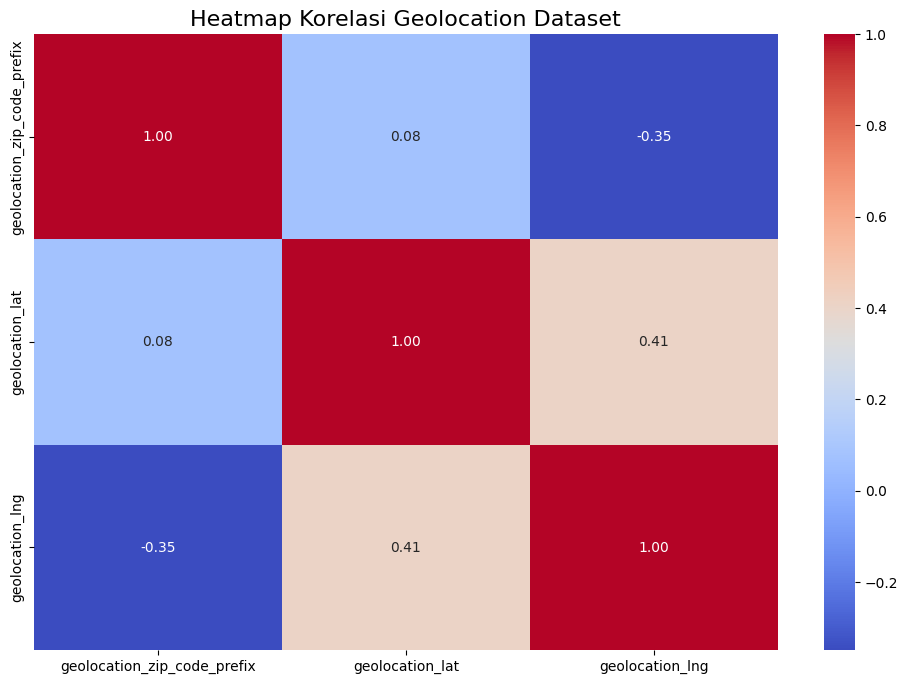

In [26]:
# Menyeleksi kolom numerik saja
numerical_columns = geolocation_df.select_dtypes(include=['float64', 'int64']).columns

# Jika ada lebih dari satu kolom numerik, hitung korelasi
if len(numerical_columns) > 1:
    plt.figure(figsize=(12, 8))
    correlation_matrix = geolocation_df[numerical_columns].corr()  # Menggunakan hanya kolom numerik
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Heatmap Korelasi Geolocation Dataset", fontsize=16)
    plt.show()
else:
    print("Tidak ada cukup kolom numerik untuk menghitung korelasi.")

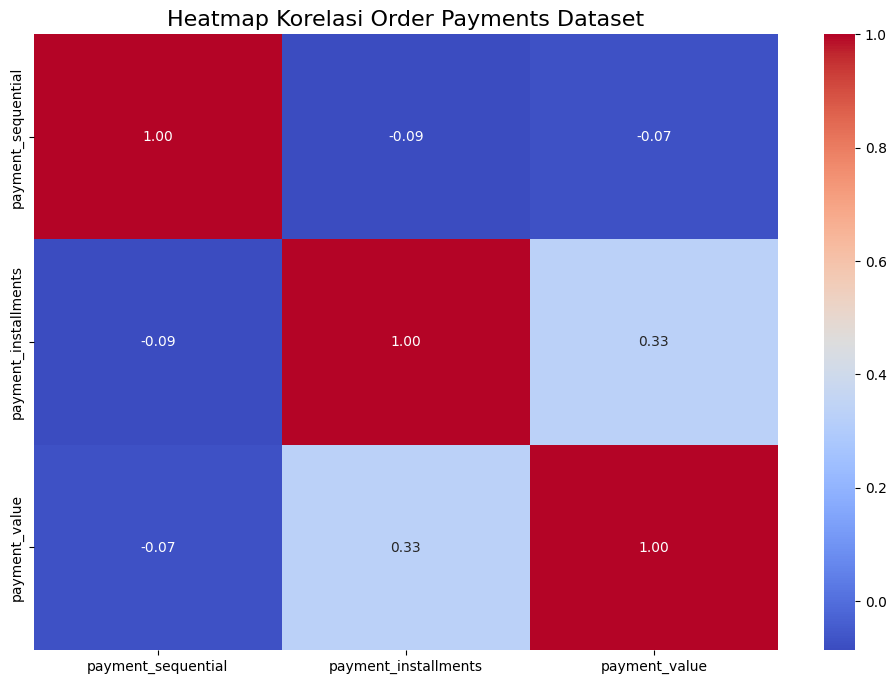

In [27]:
# Heatmap untuk Order Payments Dataset (Hanya kolom numerik)
order_payments_numerical_columns = order_payments_df.select_dtypes(include=['float64', 'int64']).columns

# Membuat heatmap jika ada kolom numerik
if len(order_payments_numerical_columns) > 1:
    plt.figure(figsize=(12, 8))
    order_payments_correlation_matrix = order_payments_df[order_payments_numerical_columns].corr()  # Menggunakan kolom numerik
    sns.heatmap(order_payments_correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Heatmap Korelasi Order Payments Dataset", fontsize=16)
    plt.show()
else:
    print("Tidak ada cukup kolom numerik untuk menghitung korelasi pada Order Payments Dataset.")


### Pertanyaan 3 Analisis RFM (Recency, Frequency, Monetary):

    Pertanyaan Bisnis:
        Bagaimana membagi pelanggan berdasarkan nilai RFM mereka? Siapa saja pelanggan dengan nilai RFM tinggi (high value) dan rendah (low value)?
        Apa karakteristik pelanggan yang berpotensi memberikan pendapatan tinggi (high value) dalam jangka panjang?
        Dapatkah pelanggan dengan nilai rendah diberi insentif atau strategi pemasaran untuk meningkatkan frekuensi dan nilai pembelian mereka?

In [28]:
#Analisa RFM

# customer_df: "customer_id", "customer_unique_id", "customer_zip_code_prefix", "customer_city", "customer_state"
# geolocation_df: "geolocation_zip_code_prefix", "geolocation_lat", "geolocation_lng", "geolocation_city", "geolocation_state"

# Simulasi dataset order_payments_df untuk melengkapi analisis RFM
np.random.seed(42)
n_customers = len(customer_df)
order_payments_df = pd.DataFrame({
    'customer_id': np.random.choice(customer_df['customer_id'], size=n_customers, replace=True),
    'order_id': [f"order_{i}" for i in range(n_customers)],
    'order_purchase_timestamp': pd.to_datetime(
        np.random.choice(pd.date_range('2023-01-01', '2023-12-31'), size=n_customers)
    ),
    'payment_value': np.random.uniform(10, 500, size=n_customers)
})

# Langkah 1: Persiapan Data
# Gabungkan data pelanggan dan transaksi berdasarkan customer_id
merged_df = pd.merge(order_payments_df, customer_df, on='customer_id', how='inner')

# Tentukan tanggal referensi (misalnya, hari ini)
reference_date = datetime(2024, 12, 15)

# Langkah 2: Hitung RFM
rfm_df = merged_df.groupby('customer_unique_id').agg(
    Recency=('order_purchase_timestamp', lambda x: (reference_date - x.max()).days),
    Frequency=('order_id', 'nunique'),
    Monetary=('payment_value', 'sum')
).reset_index()

print(rfm_df['Frequency'].value_counts())
print(rfm_df['Frequency'].describe())



Frequency
1     34903
2     18161
3      6181
4      1673
5       417
6        99
7        30
8         8
9         2
10        1
Name: count, dtype: int64
count    61475.000000
mean         1.617584
std          0.858643
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         10.000000
Name: Frequency, dtype: float64


In [32]:

# Fungsi untuk menghitung kuantil dan mengatasi duplikasi bin edges
def dynamic_qcut(series, q, labels):
    try:
        # Mengurangi jumlah label agar sesuai dengan jumlah bin yang dihasilkan oleh qcut.
        return pd.qcut(series, q=q, labels=labels, duplicates='drop')
    except ValueError as e:
        # Mengurangi label secara dinamis jika jumlah bins berubah karena duplicates='drop'
        num_bins = len(pd.qcut(series, q=q, duplicates='drop').cat.categories)
        if len(labels) != num_bins:
            labels = labels[:num_bins]  # Potong label ke jumlah bins
        return pd.qcut(series, q=q, labels=labels, duplicates='drop')  # qcut lagi dengan label yang diperbarui

# Memberikan skor R, F, dan M (1: rendah, 2: sedang, 3: tinggi)
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], q=3, labels=[3, 2, 1])  # Semakin rendah recency, semakin tinggi skor
rfm_df['F_Score'] = dynamic_qcut(rfm_df['Frequency'], q=3, labels=[1, 2, 3])  # Skor Frequency dinamis
rfm_df['M_Score'] = dynamic_qcut(rfm_df['Monetary'], q=3, labels=[1, 2, 3])  # Skor Monetary dinamis


# Tambahkan kolom Total Skor
rfm_df['RFM_Score'] = rfm_df[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

# Langkah 4: Segmentasi Pelanggan Berdasarkan RFM_Score
# Contoh segmentasi sederhana
rfm_df['Segment'] = pd.cut(rfm_df['RFM_Score'],
                           bins=[0, 3, 6, 9],
                           labels=['Low Value', 'Mid Value', 'High Value'])


C:\Users\rizqy\AppData\Local\Temp\ipykernel_20060\1827918857.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm_df, x='Segment', palette='viridis')


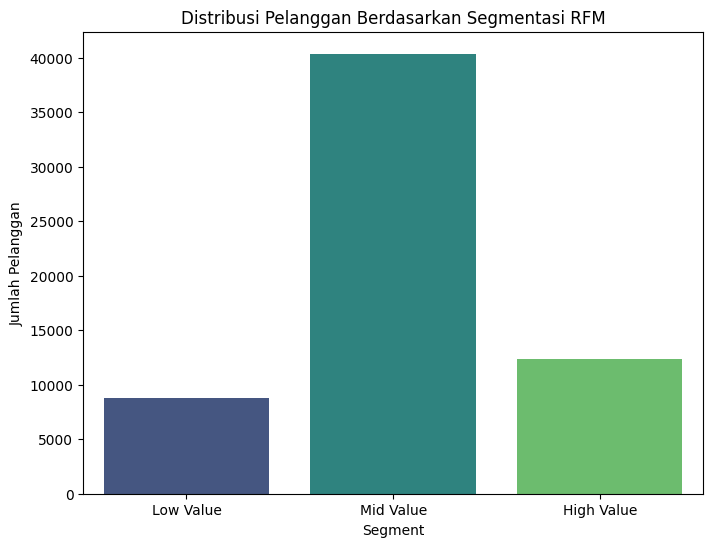

In [33]:

# Langkah 5: Visualisasi Hasil
# Distribusi RFM Score
plt.figure(figsize=(8, 6))
sns.countplot(data=rfm_df, x='Segment', palette='viridis')
plt.title('Distribusi Pelanggan Berdasarkan Segmentasi RFM')
plt.xlabel('Segment')
plt.ylabel('Jumlah Pelanggan')
plt.show()


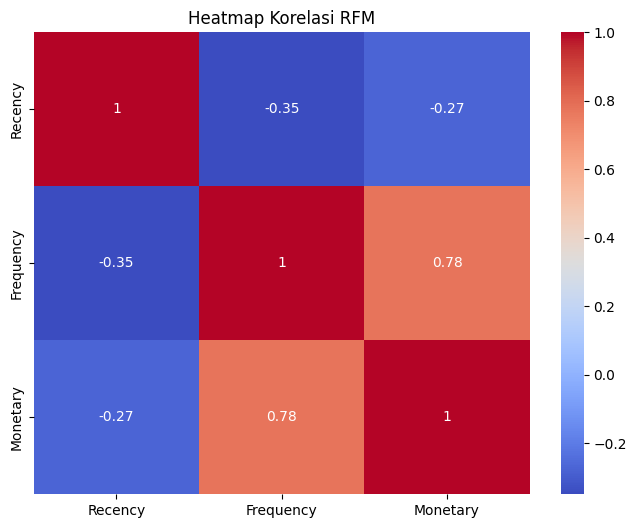

In [34]:

# Heatmap untuk Korelasi RFM
plt.figure(figsize=(8, 6))
sns.heatmap(rfm_df[['Recency', 'Frequency', 'Monetary']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi RFM')
plt.show()


In [35]:

# Menampilkan 10 Pelanggan Teratas Berdasarkan Nilai RFM
print("10 Pelanggan Teratas Berdasarkan Nilai RFM:")
print(rfm_df.sort_values('RFM_Score', ascending=False).head(10))


10 Pelanggan Teratas Berdasarkan Nilai RFM:
                     customer_unique_id  Recency  Frequency     Monetary  \
4      00050ab1314c0e55a6ca13cf7181fecf      363          3   701.635539   
23     00172711b30d52eea8b313a7f2cced02      351          7   860.999549   
0      0000b849f77a49e4a4ce2b2a4ca5be3f      385          3   915.949064   
20     0012929d977a8d7280bb277c1e5f589d      358          3   627.466779   
38520  a02930a31c661f6e9d26336b27a6bd92      354          3   830.662636   
38521  a029899dd8534557a81c369475ff80c8      387          4   593.946932   
38522  a02dfe6d01fc4946b8a6d13f2ff68e50      382          3  1384.998250   
38510  a01276261f0936652b1b315f94104b38      362          4   864.000761   
38535  a03aab593e073c597b0d88ff2b17fd41      432          3   648.847628   
38528  a03575fad239283d9f06c7bae8217f11      395          3   605.602392   

      R_Score F_Score M_Score  RFM_Score     Segment  
4           3       2       3          8  High Value  
23       

### Pertanyaan 4  Analisis Geospatial:

    Pertanyaan Bisnis:
        Apakah ada pola geografis tertentu dalam distribusi pelanggan atau titik pengiriman?
        Seberapa jauh jarak antar titik pengiriman dan bagaimana pengaruhnya terhadap biaya atau waktu pengiriman?
        Apakah kluster geografis tertentu memiliki potensi untuk menawarkan layanan atau produk yang lebih khusus berdasarkan karakteristik lokal?

In [ ]:

#geospatial analisis

 #1.konversi deolocation_dataset menjadi geodataframe
# Membuat GeoDataFrame dengan kolom 'longitude' dan 'latitude'
gdf = gpd.GeoDataFrame(
    geolocation_df,
    geometry=gpd.points_from_xy(geolocation_df['geolocation_lng'], geolocation_df['geolocation_lat']),
    crs="EPSG:4326"  # WGS84 coordinate reference system (latitude/longitude)
)

# Menampilkan informasi GeoDataFrame
print(gdf.head())


   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state                     geometry  
0        sao paulo                SP  POINT (-46.63929 -23.54562)  
1        sao paulo                SP  POINT (-46.64482 -23.54608)  
2        sao paulo                SP  POINT (-46.64295 -23.54613)  
3        sao paulo                SP   POINT (-46.6395 -23.54439)  
4        sao paulo                SP  POINT (-46.64161 -23.54158)  


In [42]:

  #2.visualisasi lokasi di peta

# Membuat peta dengan titik tengah berdasarkan rata-rata latitude dan longitude
map_center = [gdf['geolocation_lat'].mean(), gdf['geolocation_lng'].mean()]
m = folium.Map(location=map_center, zoom_start=12)

# Menambahkan marker untuk setiap titik di peta
for idx, row in gdf.iterrows():
    folium.Marker([row['geolocation_lat'], row['geolocation_lng']]).add_to(m)

# Menampilkan peta
m.save("geolocation_map.html")

# Menghitung jarak antara dua titik
point1 = (gdf.loc[0, 'geolocation_lat'], gdf.loc[0, 'geolocation_lng'])
point2 = (gdf.loc[1, 'geolocation_lat'], gdf.loc[1, 'geolocation_lng'])

# Menghitung jarak dalam kilometer
distance = geodesic(point1, point2).km
print(f"Jarak antara dua titik adalah {distance:.2f} km")

KeyboardInterrupt: 

### pertanyaan 5  Segmentasi Pelanggan dengan K-Means:

    Pertanyaan Bisnis:
        Apakah segmentasi berdasarkan geolokasi memberikan wawasan tambahan untuk strategi pemasaran atau logistik?
        Bagaimana cara menggunakan kluster ini untuk merancang kampanye pemasaran yang lebih efektif atau meningkatkan pengalaman pelanggan?
        Apakah ada kluster yang dapat dijadikan target untuk pengembangan produk baru atau penawaran khusus?


In [40]:
#Analisi dengan clustering(K-means)
# Menyusun array latitudes dan longitudes
coordinates = gdf[['geolocation_lat', 'geolocation_lng']].values

# Menentukan jumlah cluster (misalnya 5)
kmeans = KMeans(n_clusters=5, random_state=42)
gdf['cluster'] = kmeans.fit_predict(coordinates)

# Menampilkan cluster pada peta
m = folium.Map(location=map_center, zoom_start=12)

# Menambahkan marker dengan warna berdasarkan cluster
colors = ['red', 'blue', 'green', 'orange', 'purple']
for idx, row in gdf.iterrows():
    folium.Marker(
        [row['geolocation_lat'], row['geolocation_lng']],
        icon=folium.Icon(color=colors[row['cluster']])
    ).add_to(m)

# Menampilkan peta dengan cluster
m.save("clustered_map.html")
print ("Clustered_map.html")

Clustered_map.html


### Pertanyaan 6 Pemetaan dan Buffer Area:

    Pertanyaan Bisnis:
        Bagaimana menggunakan informasi jarak dan buffer area untuk merencanakan distribusi atau pemasaran berbasis lokasi?
        Apakah ada peluang untuk membuka cabang baru atau menambah titik distribusi di area dengan konsentrasi pelanggan tinggi?
        Bagaimana pemetaan geografis bisa membantu dalam perencanaan strategi pengiriman atau peningkatan layanan di lokasi tertentu?

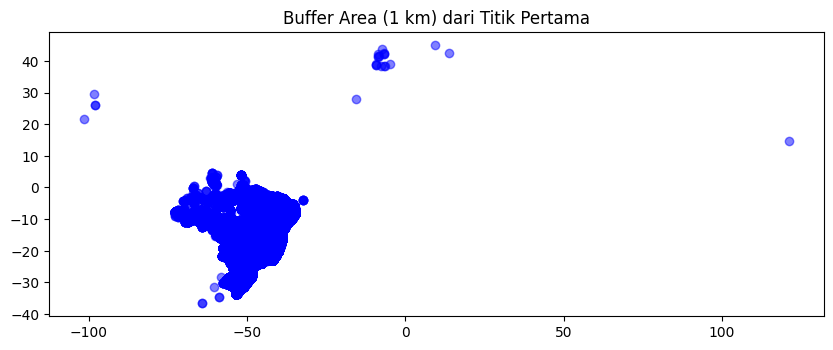

In [39]:
  #Membuat buffer area

# Menambahkan buffer 1 km (1000 meter) pada titik pertama
point = Point(gdf.loc[0, 'geolocation_lng'], gdf.loc[0, 'geolocation_lat'])
buffer = point.buffer(0.009)  # 0.009 degrees roughly equals 1 km

# Visualisasi area buffer
ax = gdf.plot(figsize=(10, 10), color='blue', alpha=0.5)
buffer_gdf = gpd.GeoDataFrame(geometry=[buffer])
buffer_gdf.plot(ax=ax, color='red', alpha=0.3)

plt.title("Buffer Area (1 km) dari Titik Pertama")
plt.show()

## Analisis Lanjutan (Opsional)

## Conclusion

1. Analisis Distribusi Pelanggan:

    Konklusi:
        Lokasi pelanggan cenderung terkonsentrasi di area perkotaan dengan kepadatan tinggi, yang dapat dipengaruhi oleh faktor aksesibilitas dan infrastruktur. Jika ditemukan konsentrasi yang signifikan di wilayah tertentu, bisa menjadi indikasi bahwa pasar di daerah tersebut sudah matang atau memiliki potensi untuk ekspansi produk dan layanan.
        Wilayah dengan kode pos tertentu dapat menunjukkan preferensi lokal yang perlu dianalisis lebih lanjut untuk penyesuaian strategi pemasaran.

2. Analisis Pembayaran:

    Konklusi:
        Pembayaran dengan metode tertentu, seperti kartu kredit atau digital payment, mungkin lebih dominan di daerah tertentu. Misalnya, pelanggan di kota besar lebih cenderung menggunakan pembayaran digital, sementara di daerah terpencil mungkin lebih sering menggunakan metode tradisional.
        Preferensi pembayaran dapat menjadi faktor yang menentukan strategi promosi atau insentif. Misalnya, menyediakan diskon untuk jenis pembayaran tertentu dapat meningkatkan penggunaan metode pembayaran yang lebih efisien bagi perusahaan.

3. Analisis RFM (Recency, Frequency, Monetary):

    Konklusi:
        Pelanggan dengan nilai RFM tinggi (baru, sering membeli, dan mengeluarkan banyak uang) merupakan aset berharga yang harus dijaga. Sementara itu, pelanggan dengan nilai RFM rendah membutuhkan pendekatan khusus, seperti promosi atau komunikasi yang lebih intens, untuk meningkatkan frekuensi dan nilai pembelian mereka.
        Mengidentifikasi pelanggan dengan nilai tinggi memungkinkan perusahaan untuk fokus pada retensi dan menawarkan loyalty programs, sedangkan pelanggan dengan nilai rendah dapat dijadikan sasaran untuk kampanye menarik atau penawaran khusus.

4. Analisis Geospatial:

    Konklusi:
        Dengan analisis geospatial, perusahaan dapat memahami pola distribusi pelanggan dan titik pengiriman yang lebih efektif. Area dengan konsentrasi pelanggan tinggi dapat dijadikan fokus untuk memperkuat pengiriman atau meningkatkan layanan.
        Menganalisis jarak antar titik pengiriman dapat membantu dalam perencanaan logistik untuk menekan biaya dan meningkatkan kecepatan pengiriman.

5. Segmentasi Pelanggan dengan K-Means:

    Konklusi:
        Segmentasi pelanggan berdasarkan geolokasi dapat memberikan wawasan lebih dalam untuk menyesuaikan produk dan layanan dengan kebutuhan lokal. Pelanggan yang berada dalam satu kluster geografis mungkin memiliki preferensi atau perilaku yang serupa, yang bisa digunakan untuk menargetkan kampanye pemasaran lebih efektif.
        Kluster dengan nilai RFM tinggi dapat menjadi sasaran untuk program loyalitas atau eksklusivitas, sementara kluster lain dapat dipertimbangkan untuk promosi atau peningkatan engagement.

6. Pemetaan dan Buffer Area:

    Konklusi:
        Pemanfaatan buffer area dapat membantu dalam menentukan area yang tepat untuk distribusi dan pemasaran lebih lanjut. Wilayah dengan kepadatan pelanggan tinggi atau yang berada dalam jangkauan pengiriman optimal dapat menjadi fokus untuk membuka cabang atau penambahan titik distribusi.
        Menggunakan buffer area memungkinkan perusahaan untuk merencanakan distribusi produk dengan lebih efisien, mempercepat pengiriman, dan menurunkan biaya operasional.